In [1]:
from sklearn.datasets import make_classification

In [36]:
import numpy as np
X  , y = make_classification(n_samples=100,
                            n_features=2,
                            n_classes = 2,
                            n_clusters_per_class=1,
                            random_state=42,
                            hypercube=False,
                            class_sep=4,
                            n_informative=1,
                            n_redundant=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

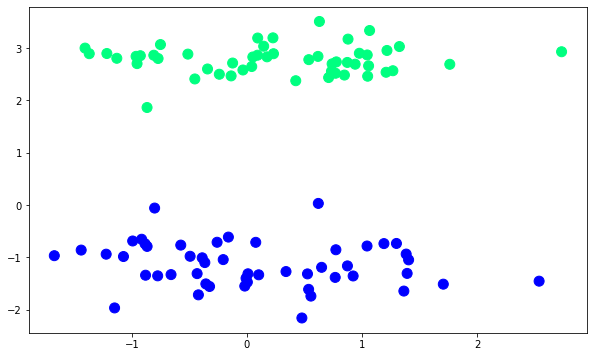

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [39]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression(penalty='none',solver='sag')
lr.fit(X,y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(penalty='none', solver='sag')

In [43]:
lr.coef_

array([[-0.16028824,  5.12099525]])

In [44]:
lr.intercept_

array([-4.06624501])

In [49]:
m1 = -(lr.coef_[0][0]/lr.coef_[0][1])
b1 = -(lr.intercept_/lr.coef_[0][1])
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

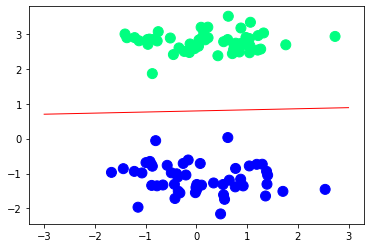

In [51]:
plt.plot(x_input,y_input,color='red',linewidth=1)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [86]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    LR = 0.5
    
    for i in range(4000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + LR *(np.dot((y-y_hat),X)/X.shape[0])
    return weights[1:],weights[0]

In [87]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [88]:
coef_,intercept_ = gd(X,y)

In [89]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input + b

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

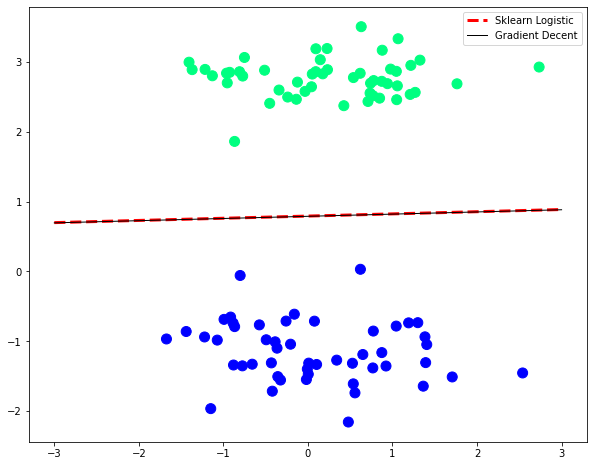

In [95]:
plt.figure(figsize=(10,8))
plt.plot(x_input,y_input,color='r',linestyle='dashed',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=1)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.legend(['Sklearn Logistic','Gradient Decent'])